# Captcha solver

### Steps:

#### 1. Extracting the digits from the image:
1. Preprocessing the image and converting to grayscale
2. Extracting and sorting the contours from left to right
3. Looping on all the images in folder to extract number image which are sorted from left to right.
4. Flattening the extracted digit image to 1D matrix with pixel intensities
5. Assigning the image and row in the dataframe to thier corresponding digit string using filename.

#### 2. Machine Learning Modeling

#### 3. Predictions

In [1]:
#importing libraries
import numpy as np #numpy
import cv2 as cv #OpenCV
import os #os
import pandas as pd #pandas
from matplotlib import pyplot as plt #for plotting
from sklearn.model_selection import train_test_split #for dividing data into train and test 
from sklearn import svm #svm

# Functions

In [2]:
#function for sorting
def Sortt(sub_li): 
    #for sorting contours left to right.In x[0], 0 signifies array to be sorted according to first element which is x axis in 'newarray'
    sub_li.sort(key = lambda x: x[0]) 
    return sub_li

## Function for preprocessing image
1. Load the image and convert to grayscale
2. Apply Otsu algorithm for thresholding which reduce the gray level image to a binary image.
3. Finding contours in the image
4. returning contours and grayscalled image

In [3]:
def preprocessing(file):
    #Load the image
    im = cv.imread(file)    
    #capture image in monochrome
    grayimage = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    # Otsu thresholding    
    ret, thresh = cv.threshold(grayimage, 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    # Finding contours
    processed_image, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours, grayimage

## Function for Sorting Contours
1. iterating though all the contours removing the small and big unwanted contours.
2. Sorting them from left to right

In [4]:
def SortContours(contours):
    newarray=[]
    #Looping through all contours
    for cnt in contours:
        #getting position, height and width
        x,y,w,h = cv.boundingRect(cnt)
        # leaving small and big unnecessary contours 
        if h>30 and w>30:
            continue
        if h<5 or w<5:
            continue
        newarray.append((x,y,w,h))
    #Sorting them along x axis from left to right
    sortedparams= Sortt(newarray)
    return sortedparams

## Function to extract numbers
1. Extracting contours keeping same height and weight.
2. Flatten the extracted image into 1D array which stores the intensity of each pixel of extracted contour

In [5]:
def ExtractNumbers(sortedparams,grayimage):
        x0,y0,w0,h0 = sortedparams
        #Extracting number contours from original gray-scaled image.
        grr = grayimage[y0:y0+12,x0:x0+9]
        #Otsu thresholding
        ret2,digit = cv.threshold(grr, 127, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        #Flattening to 1D array.
        pixel_array =grr.flatten()
        pixel_array = np.append(pixel_array,np.ones(180-pixel_array.shape[0])*np.NAN,axis=0)
        pixel_array = np.where(np.isnan(pixel_array), 255, pixel_array) 
        return pixel_array,digit

# 1: Process of extracting digit images from main image
1. Preprocessing the image and converting to grayscale
2. Extracting and sorting the contours from left to right
3. Looping on all the images in folder to extract number image which are sorted from left to right and assigning them thier corresponding digit from the filename.

In [6]:
directory = 'F:/CV/solved-captchas/electoral-tagged'
directory1 = 'F:/CV/'
j=0
rows = []
#Loop on all the files in the directory
for file in os.listdir(directory):
    
    #saving the filename
    filename=os.path.splitext(file)[0]
    os.chdir(directory)
    
    #Preprocessing the image
    cont, imgray = preprocessing(file)
    
    #Sorting contours left to right
    c = SortContours(cont)
    
    i=0
    #Looping on all the contours to extract digits
    for cnt in c:
        os.chdir(directory1)
        
        #Extracting digit image from each contour and pixel intensity array
        pix_array, dig =ExtractNumbers(cnt,imgray)
        
        #Adding corresponding number to the array 
        pix_array= np.insert(pix_array,0,filename[i])
        rows.append(pix_array)
        
        #Saving numbers to their corresponding folders
        if not os.path.exists(filename[i]):
            os.makedirs(filename[i])
        os.chdir(directory1+filename[i])
        cv.imwrite(str(j)+'.png', dig)   
        i=i+1
        j=j+1
        os.chdir(directory1)

In [7]:
df = pd.DataFrame(rows)

In [8]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,1.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,1.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,1.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,1.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,4.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


Here the first column is the digit and the rest of columns are the intensity of respectve pixels.

# 2: Visualising

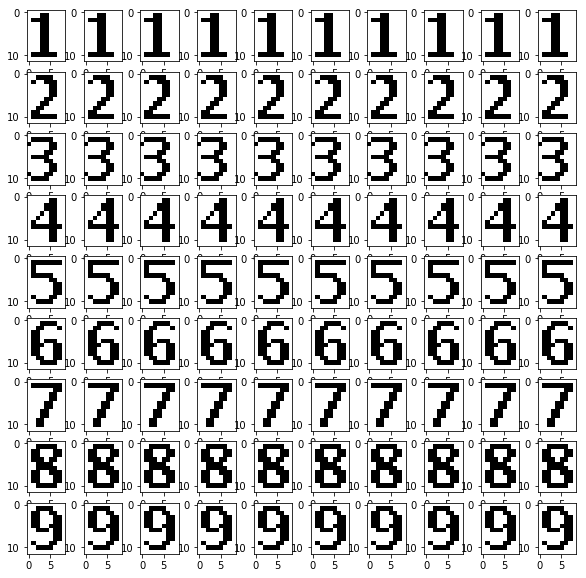

In [9]:
# Visualising
f, axarr = plt.subplots(9,10,figsize=(10,10))
for l in range(1 , 10):
    dir= directory1+str(l)
    os.chdir(dir)
    m=0
    for fl in os.listdir(dir):
        if m>9:
            break
        op = cv.imread(fl)
        axarr[l-1,m].imshow(op)
        m=m+1


The images of respective digits looks more or less the same.


# 3:Machine Learning Modeling

Using SVM

In [10]:
# Divinding columns into data and labels
label= df[0]
data= df.drop(columns=0)
print("Data Shape: ",data.shape)
print("Label Shape: ",label.shape)

Data Shape:  (4700, 180)
Label Shape:  (4700,)


In [11]:
#Dividing rows into training and test datasets
train, test,train_labels, test_labels = train_test_split(data, label, train_size=0.8, random_state=42)
print("Train Data Shape: ",train.shape)
print("Train Label Shape: ",train_labels.shape)
print("Test Data Shape: ",test.shape)
print("Test Label Shape: ",test_labels.shape)

Train Data Shape:  (3760, 180)
Train Label Shape:  (3760,)
Test Data Shape:  (940, 180)
Test Label Shape:  (940,)


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
#Model Training and testing accuracy on test dataset
clf = svm.SVC()
clf.fit(train, train_labels.values.ravel())
score=clf.score(test,test_labels)
print("Accuracy: ",score)

Accuracy:  0.997872340425532


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 4: Predictions
Add the path to the file to solve the captcha

In [13]:
directory2 = 'F:/CV/unsolved-captchas/electoral-captchas'
os.chdir(directory2)
cont22, imgray22 = preprocessing('0.png')
c22 = SortContours(cont22)
answer = ''
for cnt22 in c22:
    pix_array22, dig22 =ExtractNumbers(cnt22,imgray22)
    df22 = pd.DataFrame([pix_array22])
    answer += str(int(clf.predict(df22)[0]))

In [14]:
answer

'66372'

renaming all files in unsolved-captcha folder to predicted numeric string

In [16]:
#Loop on all the files in the directory
directory3 = 'F:/CV/solved-images'
b=0
for file in os.listdir(directory2):
    #os.chdir(directory2)
    
    #Preprocessing the image
    cont9, imgray9 = preprocessing(file)
    
    #Sorting contours left to right
    c9 = SortContours(cont9)
    
    answer = ''
    #Looping on all the contours to extract digits
    for cnt9 in c9:        
        #Extracting digit image from each contour and pixel intensity array
        pix_array9, dig9 =ExtractNumbers(cnt9,imgray9) 
        df9 = pd.DataFrame([pix_array9])
        answer += str(int(clf.predict(df9)[0]))
    try:
        os.rename(file, answer+'.png')
    except:
        os.rename(file, answer+'-'+str(b)+'.png')
        b=b+1